In [2]:
from src.canny import *
from src.robust_fit import *
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

im = plt.imread("img/coins1.jpg")

def conv2d_median(f,size=(3,3),k=1,**kwargs):
    w,h = size
    W,H,D = f.shape
        
    x_pad = int(0.5*((W-1)*k-W+w))
    y_pad = int(0.5*((H-1)*k-H+w))
        
    f_pad = np.pad(f,((y_pad,y_pad),(x_pad,x_pad),(0,0)),mode='constant')
    
    new_im = []
    for m in range(int(f_pad.shape[0]-w)+1):
        for n in range(int(f_pad.shape[1]-h+1)):
            new_im.append(np.median(f_pad[m:m+w,n:n+h,:],axis=(0,1)))
            
            
    return np.array(new_im).reshape(W,H,D)

def treat_im(im):
    im = conv2d_median(im,size=(11,11),k=1)
    return im

bw_im = np.mean(treat_im(im),axis=2)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


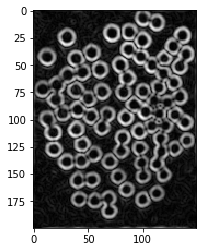

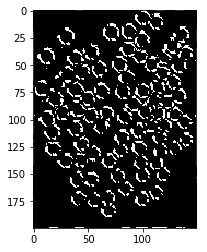

In [3]:
canny1 = canny('img/coins1.jpg',deriv_type='fd',sharp=False,
             blur=True,h=5,w=5,sig=5/3,th=.3,Red=3)

In [43]:
pts = np.argwhere(canny1.mask)
pts = np.vstack((pts.T,np.ones(pts.shape[0]))).T 
normals = canny1.n

In [44]:
a = np.divide(normals[1],normals[0],out=np.zeros_like(normals[1]),where=normals[0]!=0)

a = a[pts[:,:2].astype(int)[:,0],pts[:,:2].astype(int)[:,1]]

b = pts[:,1] - pts[:,0]*a

l = np.array((-a,np.ones_like(a),-b)).T

idx = np.random.choice(np.arange(pts.shape[0]),2)
c = np.cross(l[idx[0]],l[idx[1]])
c/c[2]

array([113.036013  ,  59.68715379,   1.        ])

[[161.]
 [ 90.]
 [  1.]]


array([[  -0.28032945,    1.        ,   -8.02122117],
       [   1.09982208,    1.        , -141.48309779],
       [  -0.28032945,    1.        ,   -8.02122117]])

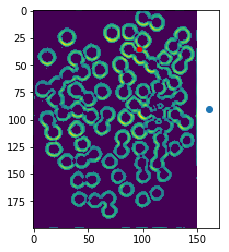

In [58]:
idx = np.random.choice(np.arange(pts.shape[0]),1)
#one = np.cross(l[idx[0]],l[idx[1]])

one = pts[idx].T
print(one)
#one = c[:2]/c[2]

plt.imshow(canny1.S)
plt.scatter(one[0],one[1])
det = 10

size=50
y_range = (pts[:,1] < int(one[1]+size)) & (pts[:,1] > int(one[1]-size))
x_range = (pts[:,0] < int(one[0]+size)) & (pts[:,0] > int(one[0]-size))


window = l[x_range&y_range]


plt.imshow(canny1.S)
det = 10
for i in range(1000):
    try:
        idx = np.random.choice(np.arange(window.shape[0]),3)
        selection = window[idx,:]
        v = np.cross(selection[0],selection[1])
        dist = v.dot(selection[2])/(np.sqrt(np.sum(selection[2]**2,axis=1)))

        if np.abs(dist)<det:
            keep = selection
            det = np.abs(dist)
            print(det)
    except:
        continue
    

center = np.cross(keep[0],keep[1])
center = center[:2]/center[2]
plt.imshow(canny1.S)


plt.scatter(center[0],center[1],color='red',s=20)
keep

In [103]:
keep

array([[ 3.69214238e+01,  1.00000000e+00, -1.19756414e+03],
       [ 3.69214238e+01,  1.00000000e+00, -1.19756414e+03],
       [ 6.80306962e-01,  1.00000000e+00, -1.26900260e+02]])

In [338]:
np.linalg.det(selection.T)

0.0

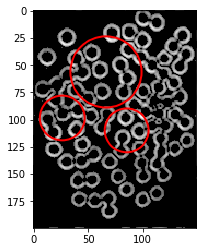

IndexError: too many indices for array

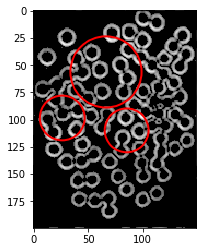

In [9]:
pts = np.argwhere(canny1.mask)
n = canny1.n

circles=[]
for i in range(10):
    N=0
    while N < 10:
        param,w,leverage = fit(pts,n,d=15,s=50,N=100,T=500,sigmaGM=100)
        
        if np.mean(leverage)<0.5:
            a,b,R=param
            inliers = np.sum((pts - (a,b))**2,axis=1) < R**2          
            circles.append(param)
            
            a,b=param[:2]
            R = param[2]
            plt.imshow(canny1.S,**{'cmap':'gray'})        
            circle = Circle((b,a),radius=R,color='red',fill=False,**{"linewidth":2})
            ax = plt.gca()
            ax.add_patch(circle)
            plt.axis('scaled')    
            
            pl.plot()
            display.clear_output(wait=True)
            display.display(pl.gcf())
            time.sleep(3.0)
            break
        N+=1
    
    pts = pts[~inliers]
        

In [46]:
normals = canny1.n

In [50]:
p = np.argwhere(canny1.mask)

In [51]:
p = np.array(p)

In [52]:
a=np.divide(normals[1],normals[0],out=np.zeros_like(normals[1]),where=normals[0]!=0)

In [53]:
a[p.T.tolist()]

array([  4.09759331,   5.96959195,   8.44320725, ..., -22.35168468,
        -7.14142799,  -8.10100854])